# Self-Driving Car Engineer Nanodegree

# Project: **Advanced Lane Finding** 

In this project, your goal is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car. The camera calibration images, test road images, and project videos are available in the project repository or in the repository folder included with the workspace.

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


- The images for camera calibration are stored in the folder called `camera_cal`.  
- The images in `test_images` are for testing your pipeline on single frames.  
- If you want to extract more test images from the videos, you can simply use an image writing method like `cv2.imwrite()`, i.e., you can read the video in frame by frame as usual, and for frames you want to save for later you can write to an image file.  


- To help the reviewer examine your work, please save examples of the output from each stage of your pipeline in the folder called `output_images`, and include a description in your writeup for the project of what each image shows.    
- The video called `project_video.mp4` is the video your pipeline should work well on.  


- The `challenge_video.mp4` video is an extra (and optional) challenge for you if you want to test your pipeline under somewhat trickier conditions.  
- The `harder_challenge.mp4` video is another optional challenge and is brutal!



## Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

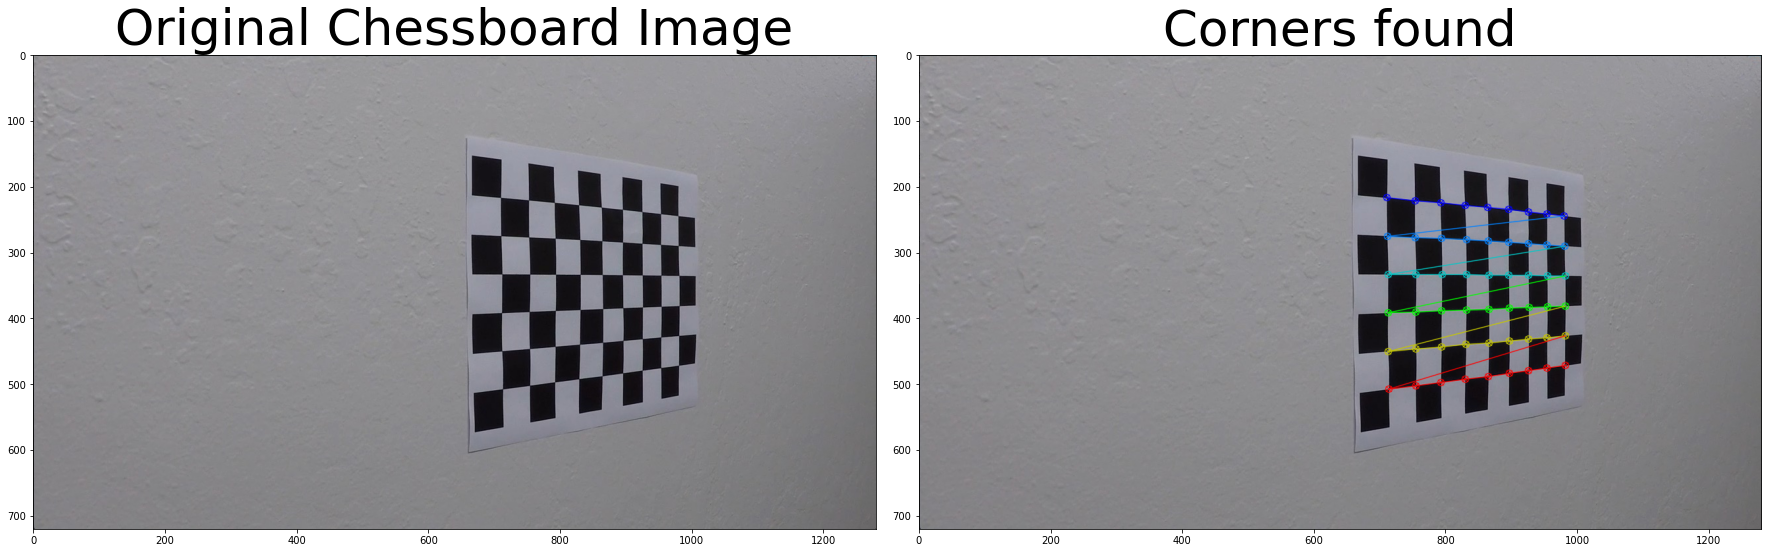

In [40]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# To handle read/write image folders
output_folder = "output_images"
cameraCalFolder = "camera_cal"
chessBoardCornersFolder = output_folder + "/001_cameraCalDisplayCorners"
chessBoardUndistortedFolder = output_folder + "/002_chessboardUndistorted"
testImageFolder = "test_images"
undistortedTestImgFolder = output_folder + "/003_undistortedTestImages"

# Function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvers = cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

def display2ImagesSideBySide(img1,txt1,img2,txt2) :
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img1)
    ax1.set_title(txt1, fontsize=50)
    ax2.imshow(img2)
    ax2.set_title(txt2, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


# images for camera calibration are stored in the folder called `camera_cal`.  
# need to set your chessboard size to 9x6 for the project instead of 8x6 as in the lesson.

# multiple pictures of the chessboard against a flat surface, 
# then we’ll be able to detect any distortions by  looking at the difference between apparent 
# size and the shape of squares in these images, and the size and shape that they actually are.
#    • Then we’ll use that information to calibrate our camera.
#    • Create a transform that maps distorted point to undistorded points.
#    • And finally, undistort any images.

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# counter to display only result for 1st image
nb = 0
    
# Step through the list and search for chessboard corners
for fname in images:
    img = mpimg.imread(fname)
    img2 = np.copy(img)
    # convert image to gray scale, 
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
         
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #plt.imshow(img)
        
        # save output images -- for Writeup illustrations
        mpimg.imsave( chessBoardCornersFolder + '/' + fname.replace(cameraCalFolder + '/',''),img,cmap='gray')
    
        # Display exemple for first chessboard image
        #if fname == images[0] : # not sure why but it does not work !!!
        if nb == 0 :
            display2ImagesSideBySide(img2,'Original Chessboard Image',img,'Corners found')
        nb = nb + 1
            

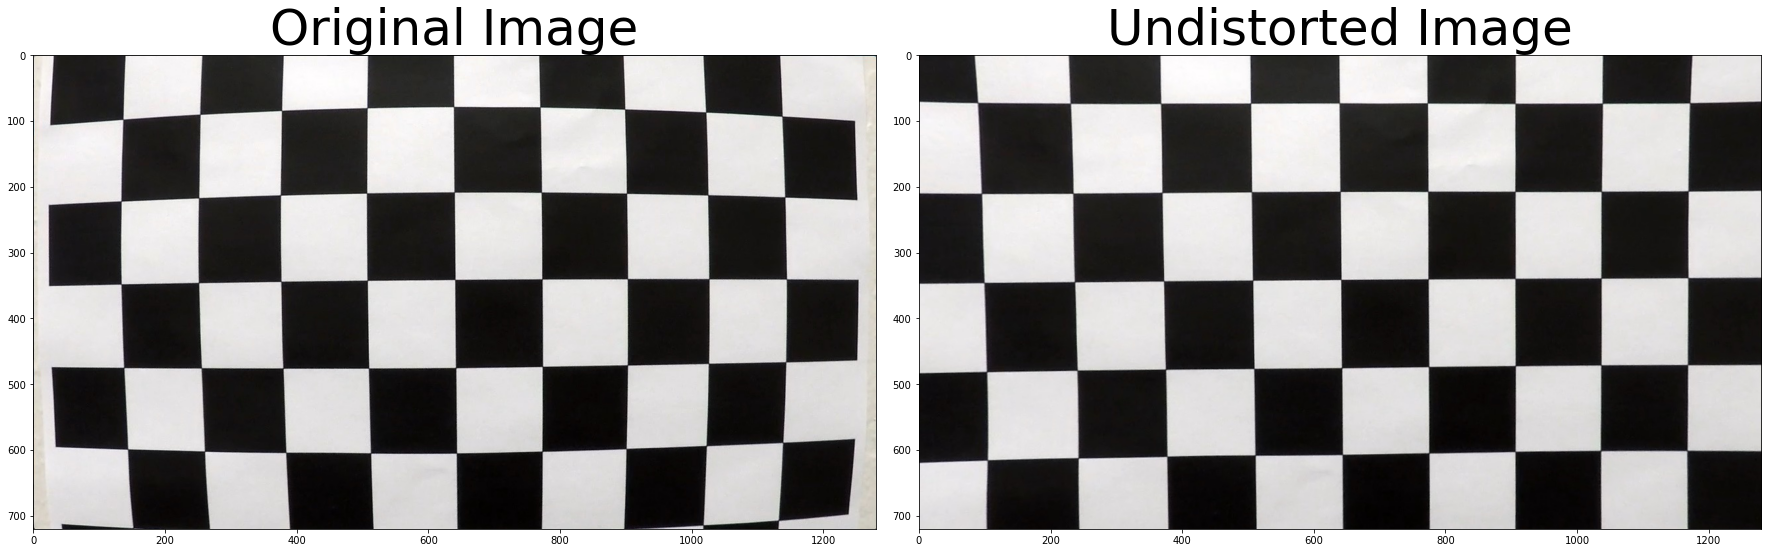

In [38]:
# Now based on al objpoints + imgpoints, will compute camera calibration matrix 
# and distortion coefficients (mtx and dist)
ret, mtx, dist, rvecs, tvers = cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)

# Just to check, will undistort and show/save chessboard images
#nb = len(images)

for fname in images:
    img = mpimg.imread(fname)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # save output images -- for Writeup illustrations
    mpimg.imsave( chessBoardUndistortedFolder + '/' + fname.replace(cameraCalFolder + '/',''),undist)
    
    # display exemple for first chessboard image
    if fname == images[0] :
        display2ImagesSideBySide(img,'Original Image',undist,'Undistorted Image')

## Apply a distortion correction to raw images.

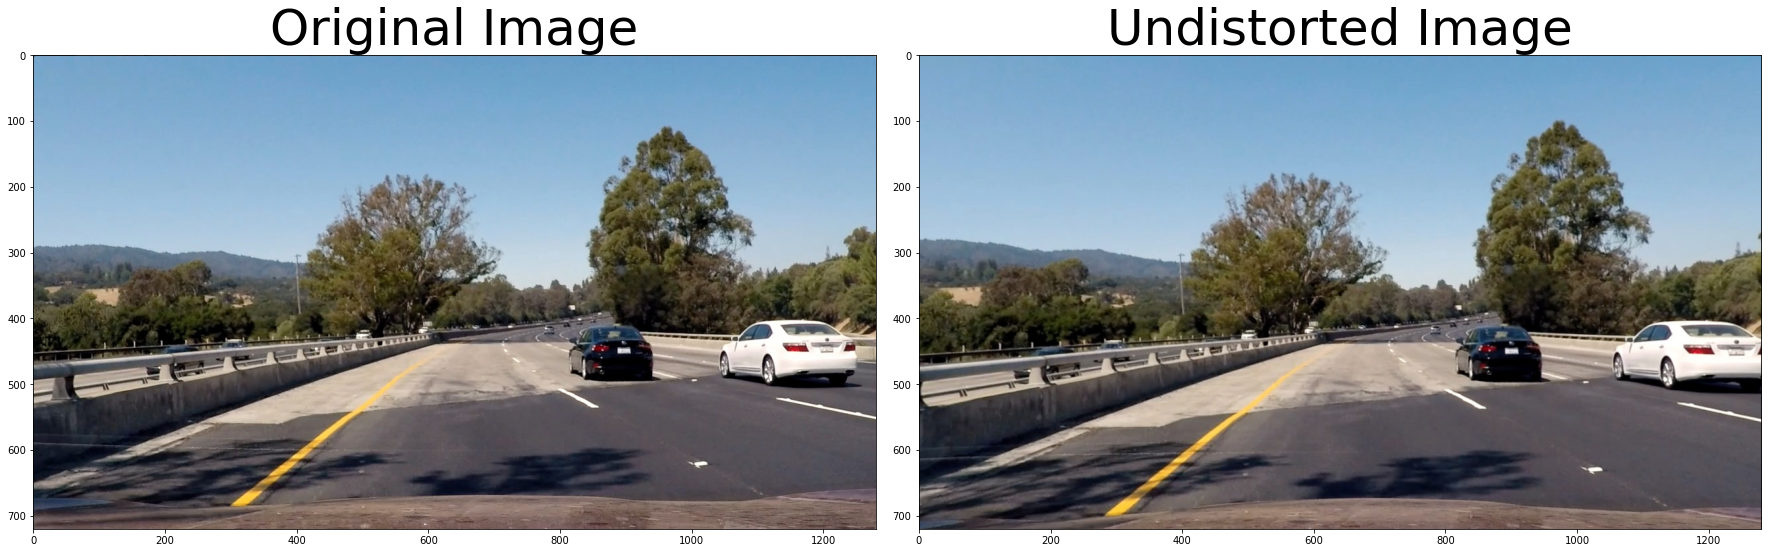

In [41]:
# Make a list of test images
filenames = os.listdir(testImageFolder)

for fname in filenames :
    # Read in image 
    img = mpimg.imread(testImageFolder + '/' + fname)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # save output images -- for Writeup illustrations
    mpimg.imsave( undistortedTestImgFolder + '/' + fname,undist)
    
    # display exemple for first chessboard image
    if fname == filenames[0] :
        display2ImagesSideBySide(img,'Original Image',undist,'Undistorted Image')

## Use color transforms, gradients, etc., to create a thresholded binary image.